# Analysis of forest fire in Brazil

### Read data

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
# Load data set
forest_fire = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding='ISO-8859–1')
forest_fire.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
forest_fire.info()
#forest_fire.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
# change date column to pandas date time
forest_fire.date = pd.to_datetime(forest_fire.date)
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#### Lets see how many states are available in data set

In [5]:
# total states
print('Total states \n', forest_fire.state.unique())

Total states 
 ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


### Cleaning and preparing data

#### There are lots of state so plotting all of them will not make sense. So, lets find top 5 state based on total number of fire

In [6]:
# get state wise data for each year
df = forest_fire.groupby(['date', 'state'])['number'].sum().to_frame()
df.reset_index(inplace=True)
df

,date,state,number
0,1998-01-01,Acre,730.000
1,1998-01-01,Alagoas,86.000
2,1998-01-01,Amapa,278.000
3,1998-01-01,Amazonas,946.000
4,1998-01-01,Bahia,1224.687
...,...,...,...
455,2017-01-01,Roraima,1101.000
456,2017-01-01,Santa Catarina,2354.000
457,2017-01-01,Sao Paulo,2540.868
458,2017-01-01,Sergipe,75.000


In [7]:
#get top 5 states based on number of fires
s = df.groupby('state')['number'].sum()

s.sort_values(ascending=False, inplace=True)

top5state = s[:5].index.values

In [8]:
# keep only top 5 states
df = df[df['state'].isin(top5state)]

### Plotting

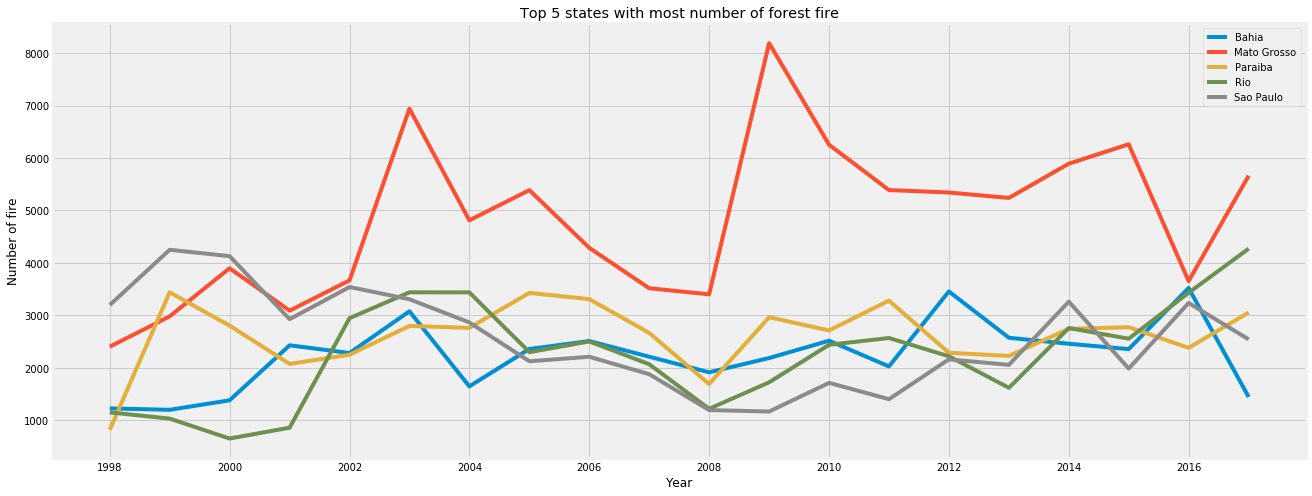

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot each state graph
plt.figure(figsize=(20,8))

grouped = df.groupby('state')

for name, frame in grouped:
    plt.plot(frame.date, frame.number, label=name)

plt.xlabel('Year')
plt.ylabel('Number of fire')
plt.title('Top 5 states with most number of forest fire')
plt.legend(loc=1)
plt.show()

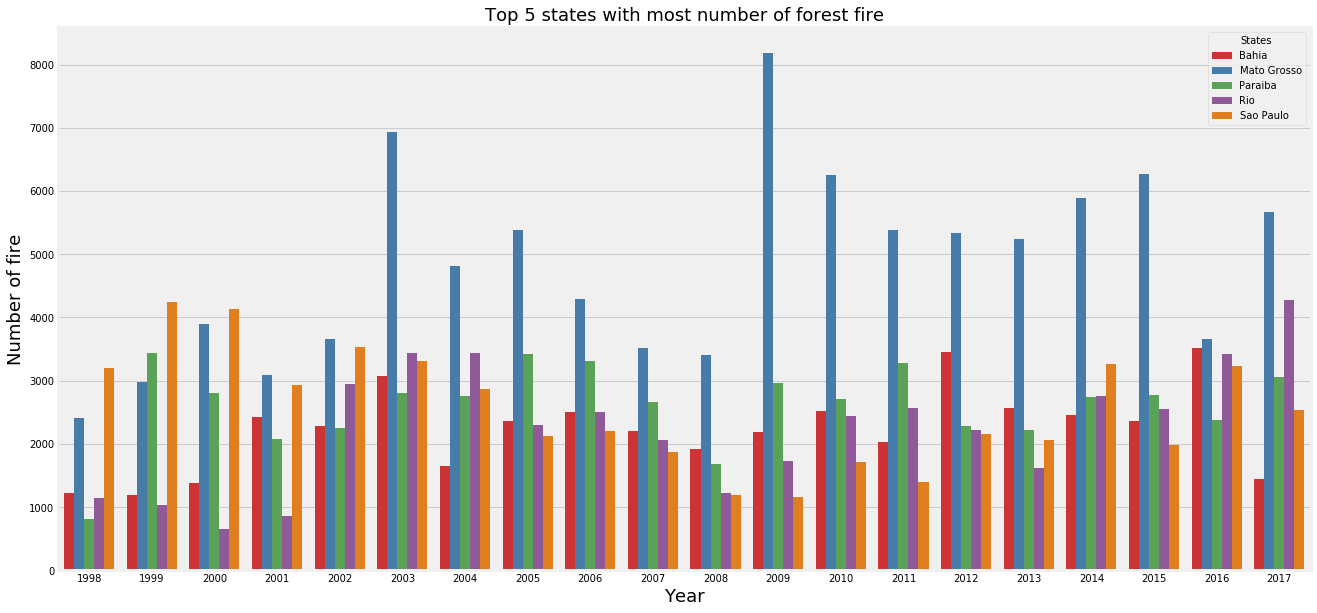

In [10]:
# Plot each state graph
plt.figure(figsize=(20,10))
#sns.set()

cp = sns.color_palette(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'])
bars = sns.barplot(x='date', y='number', hue='state', data=df, palette=cp)

# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of fire', fontsize=18)
ax.set_title('Top 5 states with most number of forest fire', fontsize=18)
ax.set_xticklabels(df.date.dt.strftime('%Y').unique());
ax.legend().set_title('States')
#legend = ax.legend()
#legend.texts[0].set_text("Whatever else")


In [11]:
# fire in 2017
data = df[df.date.dt.year == 2017]
data

,date,state,number
441,2017-01-01,Bahia,1441.814
447,2017-01-01,Mato Grosso,5661.327
449,2017-01-01,Paraiba,3052.706
453,2017-01-01,Rio,4271.000
457,2017-01-01,Sao Paulo,2540.868


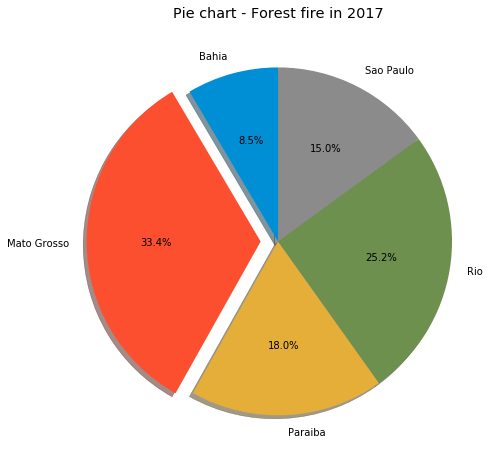

In [12]:
plt.figure(figsize=(12,8))
#plt.pie(x=data.number, labels=data.state);
explode = (0, .1, 0, 0, 0)  
plt.pie(data.number, explode=explode, labels=data.state, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.title('Pie chart - Forest fire in 2017');

### Month wise forest fire count

In [13]:
monthwisefire = forest_fire.groupby('month')['number'].mean()

## month mapping to date time. Year doesnt matter. We will use month to print it on plot
month_mapping = {
                 'Janeiro' : '1/1/2017', 'Fevereiro' : '1/2/2017', 'Março' : '1/3/2017',
                 'Abril' : '1/4/2017', 'Maio' : '1/5/2017', 'Junho' : '1/6/2017',
                 'Julho' : '1/7/2017', 'Agosto' : '1/8/2017', 'Setembro' : '1/9/2017',
                 'Outubro' : '1/10/2017', 'Novembro' : '1/11/2017', 'Dezembro' : '1/12/2017'
                 }

monthwisefire = monthwisefire.reset_index()
monthwisefire.month.replace(month_mapping, inplace=True)
monthwisefire.month = pd.to_datetime(monthwisefire.month, format='%d/%m/%Y')
monthwisefire.sort_values(by='month', inplace=True)


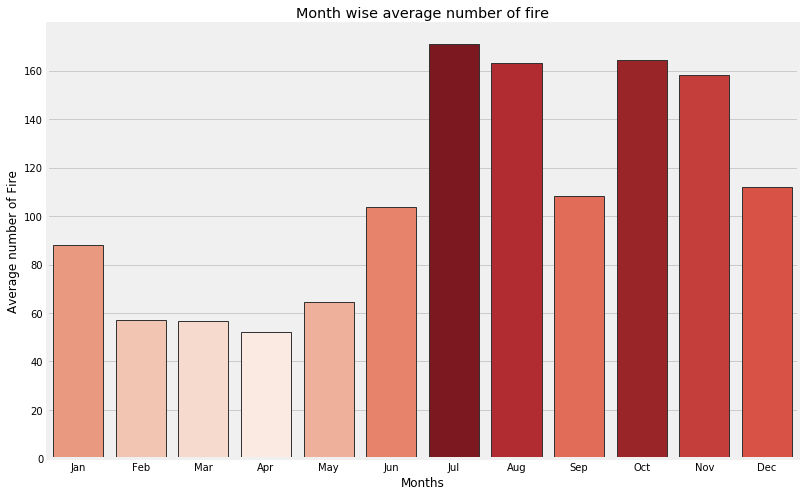

In [14]:
import matplotlib.dates as mdates
import datetime

plt.figure(figsize=(12, 8))
pal = sns.color_palette("Reds_r", len(monthwisefire))
rank = monthwisefire.number.argsort().argsort()
sns.barplot(monthwisefire.month.dt.strftime('%b'), monthwisefire.number, palette=np.array(pal[::-1])[rank], 
            linewidth=1, edgecolor=".2");

ax = plt.gca()
ax.set_xlabel('Months')
ax.set_ylabel('Average number of Fire')
ax.set_title('Month wise average number of fire');